In [2]:
import numpy as np
import pandas as pd

In [3]:
data = {
    'CustomerID':[1,2,3,4,5,6,7,8,9,10],
    'Annual Income':[15,16,17,18,19,20,21,22,23,24],
    'Spending Score':[39,81,6,77,40,76,6,94,3,72]}
display(data)

df = pd.DataFrame(data)
df


{'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'Annual Income': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
 'Spending Score': [39, 81, 6, 77, 40, 76, 6, 94, 3, 72]}

,CustomerID,Annual Income,Spending Score
0,1,15,39
1,2,16,81
2,3,17,6
3,4,18,77
4,5,19,40
5,6,20,76
6,7,21,6
7,8,22,94
8,9,23,3
9,10,24,72


In [4]:
X = df[['Annual Income', 'Spending Score']]
print("\n Selected features  for clustering\n",X)



 Selected features  for clustering
    Annual Income  Spending Score
0             15              39
1             16              81
2             17               6
3             18              77
4             19              40
5             20              76
6             21               6
7             22              94
8             23               3
9             24              72


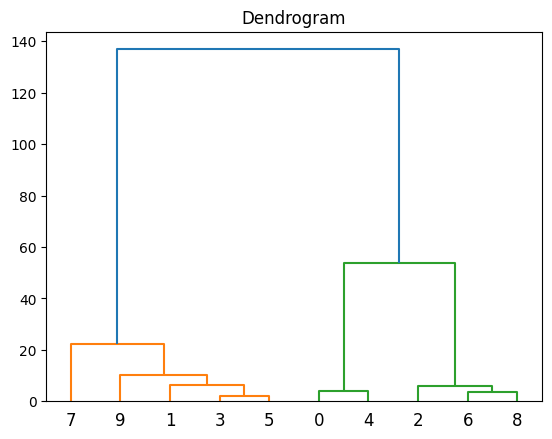

In [5]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.show()

In [6]:
# Step 5: Apply Agglomerative Clustering with the chosen number of clusters

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
df['Cluster'] = cluster.fit_predict(X)
print("\n Agglomerative Clustering:\n", df)


 Agglomerative Clustering:
    CustomerID  Annual Income  Spending Score  Cluster
0           1             15              39        2
1           2             16              81        0
2           3             17               6        1
3           4             18              77        0
4           5             19              40        2
5           6             20              76        0
6           7             21               6        1
7           8             22              94        0
8           9             23               3        1
9          10             24              72        0


In [7]:
# Optimal number of clusters = 3

In [8]:
# Step 6: Interpret the clusters

for cluster in sorted(df['Cluster'].unique()):
    group =df[df['Cluster']==cluster]
    print(f"\nCluster {cluster} Summary:")
    print(group[['Annual Income','Spending Score']].describe())
    


Cluster 0 Summary:
       Annual Income  Spending Score
count       5.000000        5.000000
mean       20.000000       80.000000
std         3.162278        8.455767
min        16.000000       72.000000
25%        18.000000       76.000000
50%        20.000000       77.000000
75%        22.000000       81.000000
max        24.000000       94.000000

Cluster 1 Summary:
       Annual Income  Spending Score
count       3.000000        3.000000
mean       20.333333        5.000000
std         3.055050        1.732051
min        17.000000        3.000000
25%        19.000000        4.500000
50%        21.000000        6.000000
75%        22.000000        6.000000
max        23.000000        6.000000

Cluster 2 Summary:
       Annual Income  Spending Score
count       2.000000        2.000000
mean       17.000000       39.500000
std         2.828427        0.707107
min        15.000000       39.000000
25%        16.000000       39.250000
50%        17.000000       39.500000
75%        18.0